In [2]:
import numpy as np
import pandas as pd

# PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

# Data preparation
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split

# MODELS
# models import
from sklearn import model_selection
from sklearn import ensemble #ансамбли
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn import linear_model #линейные модели
from sklearn.linear_model import LogisticRegression
from sklearn import tree #деревья решений
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# ENSEMBLE Methods
# boosting models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
#! pip install xgboost
#! pip install catboost

# stacking models
from sklearn.ensemble import StackingRegressor # scikit-learn library, for REGRESSION class = StackingRegressor
from sklearn.ensemble import StackingClassifier # scikit-learn library, for REGRESSION class = StackingClassifier

# CLUSTERIZATION 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score

# PCA SVD t-SNE:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.manifold import TSNE

# Model optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Visualization Functions
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


# Metrics
from sklearn import metrics #метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from catboost.utils import get_confusion_matrix

# REGEX
import re

# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [3]:
import warnings 
from IPython.display import display, HTML
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True

## <span style="color:black">**1. Знакомство со структурой данных**</span>

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Ознакомление с исходными данными:
* Провести статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнать, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнать, из каких стран совершались транзакции.
* Проверить данные на наличие пропусков и дубликатов.
* Перевести столбцы в корректные форматы (например, даты в формат datetime).

In [4]:
# импортируем данные, выводим первые 5 строк таблицы
data = pd.read_csv(r"C:\Users\mureev\Dropbox\SKILLFACTORY\IDE\math_ml2_PROJECT6\data\data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
display(data.head(5))
data.info()

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
# Переводим дату и время в формат datetime и выводим интервал временного охвата транзакционной деятельности
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval from {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval from 2010-12-01 to 2011-12-09


In [6]:
# Выводим статистические параметры для количественных признаков
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


***ВЫВОД:***  
видим, что подавляющее большинство транзакций осуществляется на небольшие суммы. Однако, встречаются транзакции и на огромные суммы 

In [7]:
# # Выводим статистические параметры для категориальных признаков
display(data.describe(include=['object']))
data.Country.unique()

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

***ВЫВОД:***
- всего задействовано 4372 клиента из 38и стран (поавляющее большинство из Великобритании)
- всего в обороте участвует 4070 разных товаров, один из них 'WHITE HANGING HEART T-LIGHT HOLDER' был в обороте 2313 раз
- всего клиентами сделано 25900 заказов, при этом заказ (счет фактура) номер 573585 содержит наибольшее кол-во товаров - 1114

## <span style="color:black">**2. Преобразование, очистка и анализ данных**</span>


### **2.1. Преобразование и очистка данных о транзакциях**

#### *2.1.1 Обработка пропусков*

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [8]:
display(data.isna().sum())
before = data.shape[0]
data = data.dropna()
after = data.shape[0]
nans = data.isna().sum()

print(f'The number of rows in the initial dataset is {before}, after dropping NaNs - {after}')

display(nans)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The number of rows in the initial dataset is 541909, after dropping NaNs - 406829


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### *2.1.2. Дубликаты*

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [9]:
data.duplicated().value_counts()
before = data.shape[0]
data = data.drop_duplicates()
after = data.shape[0]
print(f"The number of rows in the dataset before and after the removal of duplicates is {before} and {after}, respectively")

The number of rows in the dataset before and after the removal of duplicates is 406829 and 401604, respectively


In [10]:
data['InvoiceDate'].nunique()

20460

#### *2.1.3. Транзакции с отрицательным количеством товара*

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [11]:
print("Всего возвратных трансакций: {}".format(sum(data['Quantity']<0)))

Всего возвратных трансакций: 8872


,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


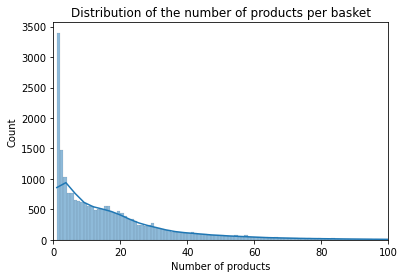

In [12]:
# считаем кол-во уникальных типов товаров сделанных каждым клиентом, 
# для этого группируем таблицу по идентификатору клиента(CustomerID), затем по транзакции (InvocieNo) и считаем кол-во элементов внутри каждой подгруппы
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['StockCode'].count()
nb_products_per_basket = temp.rename(columns = {'StockCode':'Number of products'})
display(nb_products_per_basket.head())
sns.histplot(nb_products_per_basket['Number of products'], bins=range(101), kde=True)
plt.xlim(0,100)
plt.title('Distribution of the number of products per basket')
plt.show()


In [13]:
# Создаем признак указывающий на отмененные (канцелированные) транзакции
# добавим соотв. столбец 'cancelled'
# iterate through the InvoiceNo, matching the string, 
# leaving unchanged if it begins with the letter or filling it up with None if it is not
print('Количество всех уникальных комбинций заказа(счет)/товар: {}'.format(data.shape[0]))
print('Количество уникальных заказов: {}'.format(nb_products_per_basket.shape[0]))
nb_products_per_basket['cancelled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: x if re.match(r'^[a-zA-Z]', str(x)) else None)
# displaying the number of non-NaNs corresponding to cancelled transactions
number_of_cancelled = nb_products_per_basket[~nb_products_per_basket['cancelled'].isna()]
print('Из них, количество отмененных заказов: {}'.format(number_of_cancelled.shape[0]))

Количество всех уникальных комбинций заказа(счет)/товар: 401604
Количество уникальных заказов: 22190
Из них, количество отмененных заказов: 3654


***ВЫВОД:***
- Более 16 % уникальных заказов являются возвратами. 
- количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

#### *Создаем столбец показывающий кол-во возвращенных товаров для дальнейшего подсчета точной суммы поступившей от данного клиента*

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. \
Этот признак будет:
- указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. 
- для транзакций, для которых не было возвратов, признак будет равен 0. 
- для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, row in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == row['CustomerID']) &
                       (data['StockCode']  == row['StockCode']) & 
                       (data['InvoiceDate'] < row['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -row['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -row['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -row['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

#### Узнаем, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удаляем их из данных.
#### Удаляем транзакции с отрицательным количеством товара.

In [15]:
unpaired_cancellations = data[data['QuantityCanceled'].isna()].shape[0]
paired_cancellations = data[(~data['QuantityCanceled'].isna()) & (data['QuantityCanceled'] != 0) ].shape[0]
positive_transactions = data[data['QuantityCanceled'] == 0].shape[0]
print('Количество трансакций по отмене заказов без контрагентов: {}'.format(unpaired_cancellations))
print('Количество парных трансакций заказ/отмена: {}'.format(paired_cancellations))
print('Всего трансакций привязанных к сумме возврата: {}'.format(unpaired_cancellations+paired_cancellations))
print('Количество позитивных трансакций: {}'.format(positive_transactions))


Количество трансакций по отмене заказов без контрагентов: 1303
Количество парных трансакций заказ/отмена: 7216
Всего трансакций привязанных к сумме возврата: 8519
Количество позитивных трансакций: 393085


- необходимо удалить транзакции без контрагента и транзакции с отрицательной суммой
- проверим входят ли множество индексов первых во множество индексов вторых

In [16]:
unpaired_cancellations_indices = data[data['QuantityCanceled'].isna()].index
negative_trans_indices = data[data['Quantity']<0].index
intersection_indices = set(unpaired_cancellations_indices).intersection(set(negative_trans_indices))

len(intersection_indices)

1303

- индексы первых входят во множество вторых, т.о. удаляем только индексы транзакций с отрицательной суммой

In [17]:
data_clean = data.drop(negative_trans_indices, axis=0)

In [18]:
print('Было удалено {} строк, соответствующих трансакциям с отрицательной суммой'.format(data.shape[0]-data_clean.shape[0]))

Было удалено 8872 строк, соответствующих трансакциям с отрицательной суммой


In [19]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0


#### *2.1.4. Специализированные транзакции*

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [20]:
# find the indices corresponding to associated costs:
indirect_costs_indices = data_clean[data_clean['StockCode'].str.match(r'^[a-zA-Z]+')].index
# removing the respective indices from the dataframe
data_clean1 = data_clean.drop(indirect_costs_indices, axis=0)

print('Количество удаленных транзакций, соответствующих косвенным расходам: {}'.format(len(indirect_costs_indices)))

Количество удаленных транзакций, соответствующих косвенным расходам: 1549


#### *2.1.5. Транзакции с товарами без стоимости*

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [21]:
# Lets see how many transactions have unit price == 0
zero_price_indices = data_clean1[data_clean1['UnitPrice'] == 0].index
print('Transactions with 0 unit price amount to {}'.format(zero_price_indices.shape[0]))

Transactions with 0 unit price amount to 33


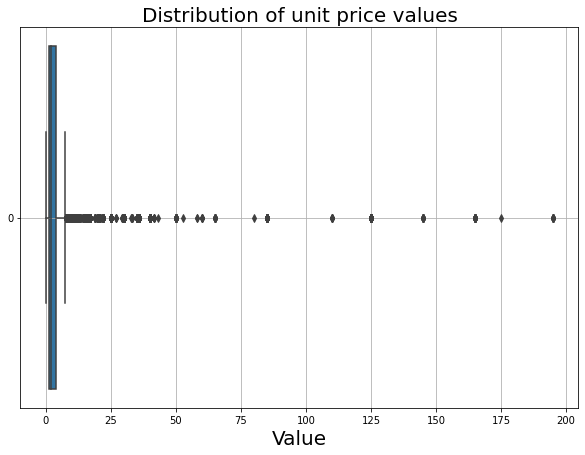

In [22]:
# see the disribution of unit prices
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data_clean1[data_clean1['UnitPrice'] < 200]['UnitPrice'],
    orient='h',
    width=0.9)
boxplot.set_title('Distribution of unit price values', fontsize=20);
boxplot.set_xlabel('Value', fontsize=20);
boxplot.grid()

*Вывод* - видим, что большинство цен за единицу товара лежат в интервале нескольких фунтов

In [23]:
# removing zero price indices:
data_clean2 = data_clean1.drop(zero_price_indices, axis=0)

#### *2.1.6. Общая стоимость товаров в транзакции*

Добавляем в датасет общую цену заказа (TotalPrice), рассчитанную как:\
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**\
Этот признак поможет рассчитать покупательскую способность каждого из клиентов.

In [24]:
data_clean2['TotalPrice'] = data_clean2['UnitPrice']*(data_clean2['Quantity']-data_clean2['QuantityCanceled'])
# data_clean2[data_clean2['QuantityCanceled'] == np.nan]

In [25]:
# сохраняем очищенную таблицу 
# data_clean2.to_csv(r'C:\Users\mureev\Dropbox\SKILLFACTORY\IDE\math_ml2_PROJECT6\data\data_clean2.csv')

### **2.2. Разведывательный анализ**

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



#### *2.2.1 Анализируем признак 'Country':*

In [26]:
data_clean2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


**Клиенты из каких стран покупают чаще?**

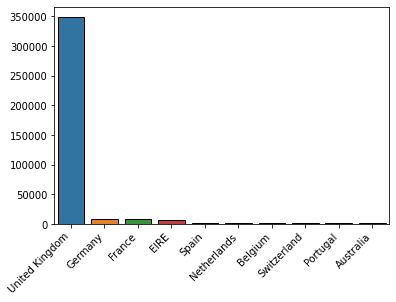

In [27]:
freq_by_country = data_clean2['Country'].value_counts(ascending=False).head(10)
sns.barplot(x=freq_by_country.index, y=freq_by_country.values)
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

**Клиенты из каких стран покупают больше товаров по количеству единиц?**

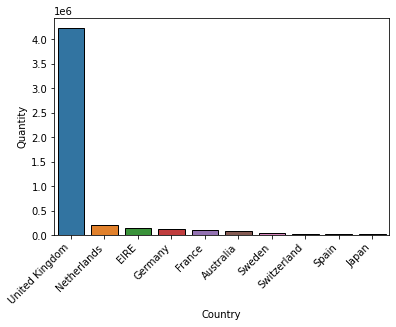

In [28]:
quantity_by_country = data_clean2.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
quantity_by_country = quantity_by_country.reset_index()
#display(quantity_by_country)
sns.barplot(data = quantity_by_country, x=quantity_by_country['Country'], y=quantity_by_country['Quantity'])
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

**Клиенты из каких стран покупают товаров на большую сумму (TotalPrice)?**

In [29]:
top_countries_purchase = data_clean2.groupby('Country')[['TotalPrice']].sum().sort_values(by='TotalPrice',ascending=False).head(10)
top_countries_purchase.style.bar(align='mid')

,TotalPrice
Country,
United Kingdom,6797691.440000
Netherlands,283443.540000
EIRE,247074.570000
Germany,201520.710000
France,181529.630000
Australia,136950.250000
Switzerland,51863.750000
Spain,51764.900000
Belgium,36673.040000


***Вывод по странам:***
* Подавляющее большинство клиентов проживает в Великобритании, откуда, соответственно, поступает наибольшее кол-во заказов на товары и куда приходит выручки

#### *2.2.2 Анализируем распределение покупательской активности по времени:*

In [30]:
# add 2 more columns which would display 'Month' and 'Hour'
data_clean2['Month'] = data_clean2['InvoiceDate'].dt.month
data_clean2['Hour'] = data_clean2['InvoiceDate'].dt.hour
data_clean2['Date'] = data_clean2['InvoiceDate'].dt.date

In [31]:
data_clean2['Season'] = data_clean2['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Autumn')
data_clean2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,Month,Hour,Date,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,12,8,2010-12-01,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12,8,2010-12-01,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,12,8,2010-12-01,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12,8,2010-12-01,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12,8,2010-12-01,Winter


- Cмотрим распределение покупательской активности по сезонам

Autumn    0.386192
Winter    0.212346
Summer    0.204466
Spring    0.196996
Name: Season, dtype: float64

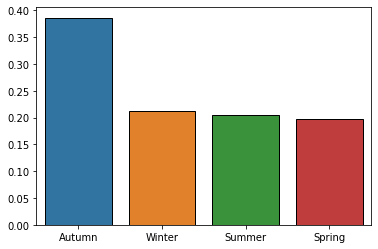

In [32]:
grouped_season = data_clean2['Season'].value_counts(normalize=True).sort_values(ascending=False)
display(grouped_season)
barplot = sns.barplot(x=grouped_season.index, y=grouped_season.values )

# fig = plt.figure(figsize=(10,8))

# barplot = sns.barplot(data=grouped_hour, x='Hour', y='AverNumHour')
# barplot.set_title('Average number of Purchases at a daytime', fontsize=20);
# barplot.set_xlabel('Daytime', fontsize=15);
# barplot.set_ylabel('Average Purchases', fontsize=15);
# barplot.grid()

#### Смотрим распределние количества купленного товара по датам в течении всего периода

In [33]:
# Найдем сначала индексы соответсвующие трансакциям с пиковым кол-вом товара
grouped_date = data_clean2.groupby(['Date'])['Quantity'].sum()
grouped_date1 = grouped_date.reset_index()
peak_dates = grouped_date1[grouped_date1['Quantity'] > 30000]
peak_dates['Difference'] = peak_dates['Quantity'].diff()
peak_dates = peak_dates.reset_index()
peak_dates = peak_dates.rename(columns={'index':'initial_index'})
peak_indices = []
for index, row in peak_dates.iterrows():
    if row['Difference'] < 0:
        peak_indices.append(peak_dates.loc[index-1, 'initial_index'])

peak_indices

[32, 196, 202, 235, 248, 249, 261, 279, 282, 290]

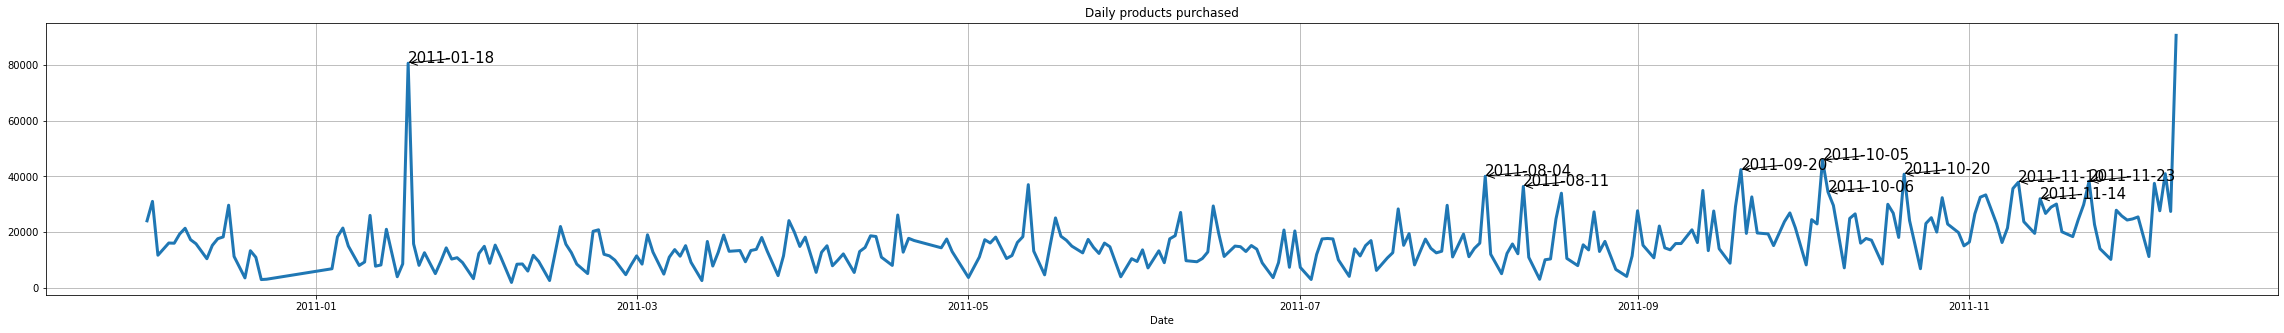

In [34]:
# Используя найденные индексы аннотируем пиковые покупки соответствующими датами
peak_indices = [32, 196, 202, 235, 248, 249, 261, 279, 282, 290] # these indices were identified following the code above
ax = grouped_date.plot(kind='line',
                figsize=(40, 5), 
                title='Daily products purchased',
                grid=True, 
                lw=3)
for i in peak_indices:
    date = grouped_date.index[i]
    quantity = grouped_date.iloc[i]
    ax.annotate(f'{date}', xy=(date, quantity), xytext=(date, quantity+50),
                arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize = 15)

plt.show()

- Смотрим распределние частоты покупок по датам в течении всего периода

In [35]:
import plotly.express as px
grouped_date = data_clean2.groupby(['Date'])['Quantity'].count().reset_index()
fig = px.line(grouped_date, x='Date', y='Quantity', title='Daily purchases',
              labels={'Quantity': 'Daily Quantity'})
fig.show()

***Вывод по распределению частоты трансакций и кол-ву купленного товара:***
* Пики покупательской активности сложно интерпретировать скорее всего они носят стохастический характер 
* Встречаются короткие периоды свободные от любой покуательской активности, вероятно приходящиеся на праздничные дни

#### Посмотрим на среднесуточное распределение покупательской активности

In [36]:
grouped_date_hour = data_clean2.groupby(['Date', 'Hour'])['InvoiceDate'].count().reset_index()
grouped_date_hour = grouped_date_hour.rename(columns={'InvoiceDate':'Purchases'})
display(grouped_date_hour)


,Date,Hour,Purchases
0,2010-12-01,8,45
1,2010-12-01,9,149
2,2010-12-01,10,114
3,2010-12-01,11,351
4,2010-12-01,12,412
...,...,...,...
2848,2011-12-09,8,112
2849,2011-12-09,9,58
2850,2011-12-09,10,128
2851,2011-12-09,11,131


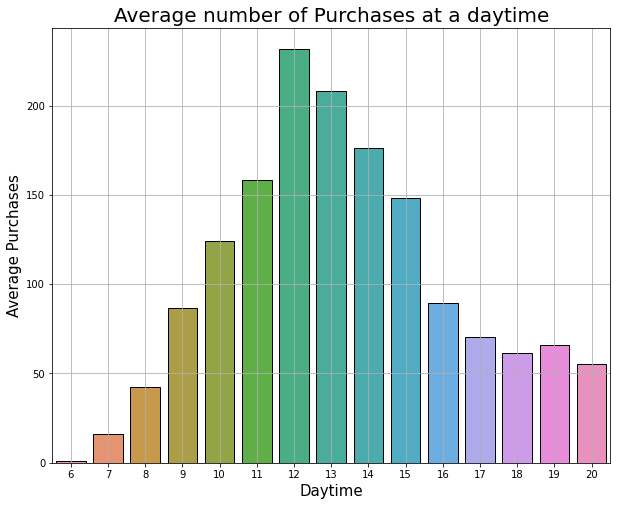

In [37]:
grouped_hour = grouped_date_hour.groupby('Hour')['Purchases'].mean().reset_index().rename(columns={'Purchases':'AverNumHour'})
fig = plt.figure(figsize=(10,8))

barplot = sns.barplot(data=grouped_hour, x='Hour', y='AverNumHour')
barplot.set_title('Average number of Purchases at a daytime', fontsize=20);
barplot.set_xlabel('Daytime', fontsize=15);
barplot.set_ylabel('Average Purchases', fontsize=15);
barplot.grid()

In [38]:
grouped_hour.describe()

,Hour,AverNumHour
count,15.000000,15.000000
mean,13.000000,102.371772
std,4.472136,69.199242
min,6.000000,1.000000
25%,9.500000,58.430851
50%,13.000000,86.456349
75%,16.500000,153.402414
max,20.000000,231.855738


***Вывод по среднесуточной покупательской активности:***
* Наивысшая плотность трансакций приходится на период с 12:00-и до 13:00-и дня
* 50% покупок осуществляется с 9:30 до 16:30

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

#### *2.3.1 Generating Recency Feature*

In [39]:
import pandas as pd
from datetime import datetime
# Assuming you have a DataFrame named 'df' with columns 'ClientID' and 'OrderTimestamp'
# and 'OrderTimestamp' is in datetime format
# Calculate the current date
reference_date = pd.to_datetime('2011-12-10 00:00:00')
# Find the latest order timestamp for each client
latest_order_dates = data_clean2.groupby('CustomerID')['InvoiceDate'].max()
# Calculate recency for each client
recency_values = (reference_date - latest_order_dates).dt.days
# Create a new DataFrame with ClientID and Recency columns
# recency_df = pd.DataFrame({'ClientID': latest_order_dates.index, 'Recency': recency_values})
# # Display the result
# print(recency_df)


#### *2.3.2 Generating Frequency Feature*

In [40]:
import pandas as pd
from datetime import datetime
# Assuming you have a DataFrame named 'df' with columns 'ClientID' and 'OrderTimestamp'
# and 'OrderTimestamp' is in datetime format

# Calculate the number of orders for each client
frequency_values = data_clean2.groupby('CustomerID')['InvoiceNo'].nunique()
# Create a new DataFrame with ClientID and Frequency columns
# frequency_df = pd.DataFrame({'ClientID': frequency_values.index, 'Frequency': frequency_values})
# Display the result
display(frequency_values)

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4334, dtype: int64

#### *2.3.3 Generating Monetary Value Feature*

In [41]:
monetary_values = data_clean2.groupby('CustomerID')['TotalPrice'].sum()
# customers_total_return = data_clean2.groupby('CustomerID')['QuantityCanceled'].sum()


#### *2.3.4 Generating RFM table*


In [42]:
rfm_table = pd.DataFrame({'Recency':recency_values.values, 'Frequency':frequency_values.values,'Monetary':monetary_values.values}, index=recency_values.index)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


Визуализируем каждую из трёх компонент в виде коробчатых диаграмм (boxplot):

In [43]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

***Вывод по распределению соответствующих признаков:***
- большинство клиентов делали последний заказ в интервале от 17 до 142 дней назад
- большинство клиентов за все время сделали о 1 до 5и заказов
- большинство заказов на сумму от 300 до 1600 фунтов
- есть клиенты с аномально большим количеством сделанных заказов (более 100 штук)
- есть клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

#### *2.3.5 Removing outliers*
- Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans. 
- Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. 
- Удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.

#### Из признаков "Frequency" & "Monetary" удаляем значения входящие в верхние 5%

In [44]:
# remove outliers above 0.95 quantile bound:
def outlier_indices(data, feature, bound=0.95):
    x = data[feature]
    upper_bound = x.quantile(bound)
    outliers = data[x > upper_bound].index
    return outliers

#### Объединим множества индексов соответствующие выбросам по частоте и по стоимости заказа

In [45]:
# находим индексы соответствующие выбросам из соотв. признаков

indices_frequency = outlier_indices(rfm_table, 'Frequency')
indices_monetary = outlier_indices(rfm_table, 'Monetary')

# оборачиваем индексы в множество для устранения возможных дупликаций

combined_set = set(indices_frequency).union(set(indices_monetary)) 
print('Number of observations before the outlier removal: {}'.format(rfm_table.shape[0]))
cleaned_rfm = rfm_table.drop(combined_set , axis = 0).reset_index(drop=True)

print('Number of observations after the outlier removal: {}'.format(cleaned_rfm.shape[0]))


Number of observations before the outlier removal: 4334
Number of observations after the outlier removal: 4044


#### Смотрим на коробчатые диаграммы распределний по пизнаам после удаления выбросов

In [46]:
boxes = [px.box(cleaned_rfm, x=column) for column in cleaned_rfm.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

## <span style="color:black">**3. Моделирование и оценка качества моделей**</span>

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


#### Снижаем Размерность до 2-ух компонент

In [47]:
pipeline = Pipeline([('sscaler', StandardScaler()),
                    ('pca', PCA(n_components=2))])
# pipeline.get_params()
X = pipeline.fit_transform(cleaned_rfm)

#### 3.1.1 *Кластеризация методом KMeans*

In [48]:
# создаем функцию для рассчета коэффициента силуэта для заданного кол-ва кластеров
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    sil = silhouette_score(X, k_means.labels_)
    return sil

#### Используем метод силуэта для поиска оптимального кол-ва кластеров

<AxesSubplot: xlabel='cluster_num', ylabel='silhouette'>

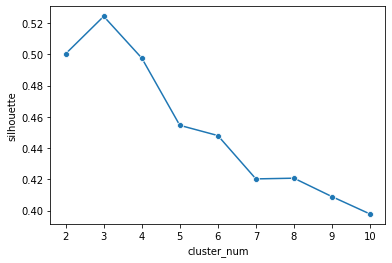

In [49]:
sil_cluster = {'silhouette':[],'cluster_num':[]}
for cluster in range(2,11):
    sil_cluster['cluster_num'].append(cluster)
    sil_cluster['silhouette'].append(get_silhouette(cluster, X))

sil_cluster_df = pd.DataFrame(sil_cluster)
# generating a lineplot:
sns.lineplot(data=sil_cluster_df, x='cluster_num', y='silhouette', marker='o')

#### В соответствии с максимальным значением коэффициента силуэта задаем 3-и кластера 

In [50]:
pipeline = Pipeline([('sscaler', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('kmeans', KMeans(n_clusters=3))])
#pipeline.get_params()
pipeline.fit(cleaned_rfm)
kmeans_labels = pipeline.predict(cleaned_rfm)

#### Визуализируем результаты KMeans кластеризации для 3-ех кластеров c использованием библиотеки Matplotlib

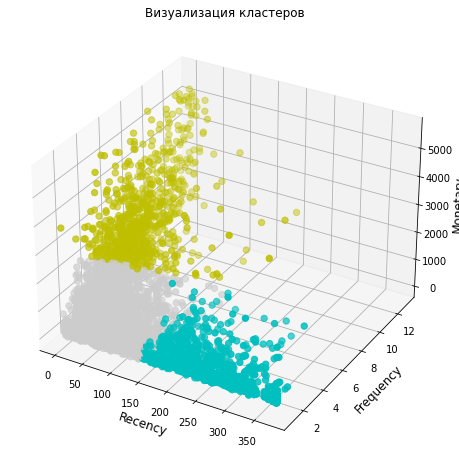

In [51]:
cmap = colors.ListedColormap(["y","g","b","r","c","m","k","0.8"])

x, y, z = cleaned_rfm['Recency'], cleaned_rfm['Frequency'], cleaned_rfm['Monetary']

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z, s=40, c=kmeans_labels, cmap=cmap, marker='o')
ax.set_title('Визуализация кластеров')
ax.set_xlabel('Recency',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_zlabel('Monetary',fontsize=12)
plt.show()

#### Визуализация c использованием библиотеки Plotly

In [52]:
fig = px.scatter_3d(
    data_frame = cleaned_rfm,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color = kmeans_labels,
    width=1000,
    height=700
)
fig.show()

#### 3.1.2 *Кластеризация методом GMM (модель Гауссовой смеси)*

In [53]:
def get_silhouette(cluster_num, X):
    gmm =  GaussianMixture(n_components=cluster_num, random_state=42)
    gmm_labels = gmm.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    sil = silhouette_score(X, gmm_labels)
    return sil

<AxesSubplot: xlabel='cluster_num', ylabel='silhouette'>

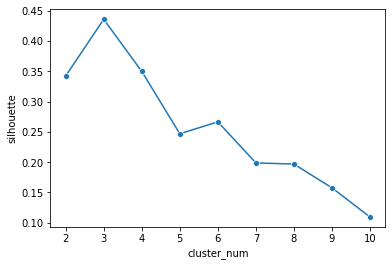

In [54]:
sil_cluster = {'silhouette':[],'cluster_num':[]}
for cluster in range(2,11):
    sil_cluster['cluster_num'].append(cluster)
    sil_cluster['silhouette'].append(get_silhouette(cluster, X))

sil_cluster_df = pd.DataFrame(sil_cluster)
# generating a lineplot:
sns.lineplot(data=sil_cluster_df, x='cluster_num', y='silhouette', marker='o')

#### В соответствии с максимальным значением коэффициента силуэта задаем 3-и кластера

In [55]:
pipeline = Pipeline([('sscaler', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('gmm', GaussianMixture(n_components=3))])
#pipeline.get_params()
pipeline.fit(cleaned_rfm)
gmm_labels = pipeline.predict(cleaned_rfm)

#### Визуализация c использованием библиотеки Plotly

In [56]:
fig = px.scatter_3d(
    data_frame = cleaned_rfm,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color = gmm_labels,
    width=1000,
    height=700
)
fig.show()

#### 3.1.3 *Кластеризация методом DBSCAN*

#### Ищем оптимальные параметры для расстояния до ближайшего соседа (eps) и 

In [67]:
param_grid = {'eps':[0.1, 0.5, 1.0, 2.0],
              'min_samples':[5, 7, 10, 15]}
param_combinations = list(ParameterGrid(param_grid))
best_silhouette = -1
best_params = {}

for params in param_combinations:
    # Fit DBSCAN with current parameters
    dbscan = DBSCAN(**params)
    dbscan.fit(X)  # X is your standardized data   
    labels = dbscan.labels_
    if len(np.unique(labels)) <= 1:
        continue
    else:
        sil = silhouette_score(X, labels)
    
    if sil > best_silhouette:
        best_silhouette = sil
        best_params = params
# The best parameters are stored in best_params
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette)

Best Parameters: {'eps': 0.5, 'min_samples': 5}
Best Silhouette Score: 0.4580489594193886


In [68]:
pipeline = Pipeline([('sscaler', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('dbscan', DBSCAN(eps = 0.5, min_samples = 5))])
#pipeline.get_params()
pipeline.fit(cleaned_rfm)
dbsc_labels = pipeline.named_steps['dbscan'].labels_
len(np.unique(dbsc_labels))

4

#### Визуализация c использованием библиотеки Plotly

In [69]:
fig = px.scatter_3d(
    data_frame = cleaned_rfm,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color = dbsc_labels,
    width=1000,
    height=700
)
fig.show()

#### две синии точки скорее всего представляют собой выбросы так как минимальное число элментов образующих кластер установлено равным 5-и
#### выясним какие у них метки:

In [60]:
occurrences = {}

# Count occurrences of each unique number
for number in dbsc_labels:
    if number in occurrences:
        occurrences[number] += 1
    else:
        occurrences[number] = 1

# Print occurrences
for number, count in occurrences.items():
    print(f"Number {number} occurs {count} times.")

Number 0 occurs 4040 times.
Number -1 occurs 4 times.


#### отрицательное значение метки означает выбросы

***Вывод по методам кластеризации:***
- Kmeans, Gauss Mixture Model и DBSCAN после ортимизации соответсвующих параметров показали схожие результаты кластеризации, выделив три кластера 
- DBSCAN также отсеял два наблюдения как выбросы

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

#### Визуализируем данные клиентов онлайн магазина в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [ ]:
kmeans_trace = px.scatter_3d(
    data_frame = cleaned_rfm,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color = kmeans_labels,
    width=1000,
    height=700
)

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


#### Подготавливаем данные к построению полярной диаграммы кластеров
- добавляем столбец меток к очищенной от верхних 5% выбросов RFM-таблице
- группируем в соответствии с метками 
- нормализуем данные 

In [65]:
cleaned_rfm['km_labels'] = kmeans_labels
grouped_data = cleaned_rfm.groupby('km_labels').mean()
display(grouped_data)
mm = preprocessing.MinMaxScaler()
grouped_data_mm = pd.DataFrame(mm.fit_transform(grouped_data), columns=grouped_data.columns)
display(grouped_data_mm)

,Recency,Frequency,Monetary
km_labels,,,
0,31.943299,7.068299,2657.746997
1,253.283716,1.405594,386.598472
2,51.127481,2.329069,660.168677


,Recency,Frequency,Monetary
0,0.000000,1.00000,1.000000
1,1.000000,0.00000,0.000000
2,0.086673,0.16308,0.120455


In [62]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

#### Строим полярную диаграмму

In [63]:
fig = plot_cluster_profile(grouped_data, 3)

## <span style="color:black">**4. Выводы и оформление работы**</span>

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

***Вывод по сегментации клиентов:***

На основе 3D точечной диаграммы распределения наблюдений RFM таблицы и полярной диаграммы (для KMeans) видно, что клиенты делятся на три группы(кластера):
- активные клиенты (кластер 0, выделены синим цвеом на обоих диаграммах), которые часто и регулярно совершают покупки и принесли онлайн магазину основной доход за год
- вторая группа (кластер 2, выделен желтым и зеленым, соответственно) могла бы быть интерпретирована как недавно присоединившиеся клиенты, которые активно делают заказы, но по частоте и приносимому доходу уступают предыдущей группе всилу более короткого периода покупательской активности, однако в таком случае Recency фактор у них должен быть меньше чем у группы входящей в кластер 0 - из полярной диаграммы видно, что это не так и следовательно вторая группа (кластер 2) представляет собой малоактивных клиентов и/или клиентов которые скоро убудут из разряда пользователей - на эту группу можно обратить особое внимание в плане поощрения покупательской активности
- кластер 1 содержит клиентов, которые уже около полугода ничего не заказывали и скорее всего могут быть причислены к убывшим

In [ ]:
import plotly.graph_objects as go

# Create three traces
trace1 = go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers', name='Plot 1')
trace2 = go.Bar(x=[1, 2, 3], y=[4, 5, 6], name='Plot 2')
trace3 = go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='lines', name='Plot 3')

# Create subplots
fig = make_subplots(rows=1, cols=3)

# Add traces to subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)

# Update layout
fig.update_layout(title='Three Plots')

# Show plot
fig.show()
